In [1]:
import cv2
import pandas as pd
import os 
import numpy as np 
from random import shuffle 
from tqdm import tqdm
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split, cross_val_score

import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import np_utils
from tensorflow.keras import layers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
INPUT_SCAN_FOLDER='C:\\Users\\Juninho\\Downloads\\NEU surface defect database' # path where the dataset is stored

slices=[]
for dirName, subdirList, fileList in os.walk(INPUT_SCAN_FOLDER):
        for filename in fileList:
            if ".bmp" in filename.lower():
                slices.append(cv2.imread(os.path.join(dirName, filename),0))

final=[]
for i in range(len(slices)):
    features = np.array([slices[i]])
    final.append(features)

slices2=[]
for i in range(len(slices)):
    pd2 = (pd.melt(pd.DataFrame(np.array(final)[i,0])))
    pd2 = (pd2.drop(["variable"], axis=1).values)
    slices2.append(pd2.T)

In [3]:
pd_final = pd.DataFrame(np.array(slices2)[:,0,:])
arr_final = np.array(pd_final)

final_2 = []

for i in range(1800):
    label=(i/300)
    features_final = np.concatenate([arr_final[i],[np.floor(label)]])
    final_2.append(features_final)
    
final_3 = pd.DataFrame(np.array(final_2))
final_3 = (final_3.rename(columns={ 40000 : 'Label'}))
final_3

,0,1,2,3,4,5,6,7,8,9,...,39991,39992,39993,39994,39995,39996,39997,39998,39999,Label
0,186.0,168.0,193.0,185.0,178.0,187.0,199.0,210.0,222.0,195.0,...,74.0,64.0,60.0,73.0,94.0,102.0,125.0,130.0,135.0,0.0
1,163.0,187.0,185.0,201.0,165.0,176.0,195.0,210.0,199.0,199.0,...,85.0,84.0,95.0,86.0,84.0,83.0,79.0,65.0,53.0,0.0
2,127.0,117.0,136.0,138.0,144.0,134.0,122.0,118.0,97.0,122.0,...,101.0,99.0,85.0,86.0,99.0,94.0,90.0,101.0,100.0,0.0
3,173.0,168.0,186.0,164.0,164.0,149.0,156.0,149.0,157.0,172.0,...,178.0,167.0,166.0,162.0,153.0,158.0,139.0,160.0,151.0,0.0
4,163.0,167.0,140.0,115.0,112.0,127.0,166.0,190.0,160.0,161.0,...,63.0,63.0,62.0,50.0,46.0,52.0,49.0,47.0,45.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,158.0,162.0,165.0,161.0,153.0,152.0,151.0,147.0,151.0,150.0,...,112.0,112.0,114.0,115.0,110.0,115.0,114.0,112.0,113.0,5.0
1796,70.0,69.0,71.0,70.0,70.0,73.0,72.0,73.0,73.0,72.0,...,100.0,101.0,103.0,99.0,99.0,103.0,103.0,102.0,102.0,5.0
1797,172.0,172.0,174.0,175.0,173.0,170.0,174.0,180.0,173.0,171.0,...,100.0,96.0,99.0,100.0,99.0,99.0,97.0,97.0,98.0,5.0
1798,61.0,57.0,64.0,62.0,62.0,59.0,62.0,64.0,62.0,64.0,...,94.0,96.0,96.0,91.0,92.0,93.0,99.0,103.0,99.0,5.0


In [5]:
conditions = [
    (final_3['Label'] == 0),
    (final_3['Label'] == 1),
    (final_3['Label'] == 2),
    (final_3['Label'] == 3),
    (final_3['Label'] == 4),
    (final_3['Label'] == 5)]
choices = ['Quebra', 'Inclusão', 'Manchas', 'Corrosão Superficial por Pite', 'Carepa Incrustada', 'Marcas Superficiais']
final_3['Defeitos'] = np.select(conditions, choices)

final_3

,0,1,2,3,4,5,6,7,8,9,...,39992,39993,39994,39995,39996,39997,39998,39999,Label,Defeitos
0,186.0,168.0,193.0,185.0,178.0,187.0,199.0,210.0,222.0,195.0,...,64.0,60.0,73.0,94.0,102.0,125.0,130.0,135.0,0.0,Quebra
1,163.0,187.0,185.0,201.0,165.0,176.0,195.0,210.0,199.0,199.0,...,84.0,95.0,86.0,84.0,83.0,79.0,65.0,53.0,0.0,Quebra
2,127.0,117.0,136.0,138.0,144.0,134.0,122.0,118.0,97.0,122.0,...,99.0,85.0,86.0,99.0,94.0,90.0,101.0,100.0,0.0,Quebra
3,173.0,168.0,186.0,164.0,164.0,149.0,156.0,149.0,157.0,172.0,...,167.0,166.0,162.0,153.0,158.0,139.0,160.0,151.0,0.0,Quebra
4,163.0,167.0,140.0,115.0,112.0,127.0,166.0,190.0,160.0,161.0,...,63.0,62.0,50.0,46.0,52.0,49.0,47.0,45.0,0.0,Quebra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,158.0,162.0,165.0,161.0,153.0,152.0,151.0,147.0,151.0,150.0,...,112.0,114.0,115.0,110.0,115.0,114.0,112.0,113.0,5.0,Marcas Superficiais
1796,70.0,69.0,71.0,70.0,70.0,73.0,72.0,73.0,73.0,72.0,...,101.0,103.0,99.0,99.0,103.0,103.0,102.0,102.0,5.0,Marcas Superficiais
1797,172.0,172.0,174.0,175.0,173.0,170.0,174.0,180.0,173.0,171.0,...,96.0,99.0,100.0,99.0,99.0,97.0,97.0,98.0,5.0,Marcas Superficiais
1798,61.0,57.0,64.0,62.0,62.0,59.0,62.0,64.0,62.0,64.0,...,96.0,96.0,91.0,92.0,93.0,99.0,103.0,99.0,5.0,Marcas Superficiais


In [6]:
X = final_3.iloc[:,0:40000]
Y = final_3.iloc[:,-2]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 11)

In [7]:
x_train = np.array(x_train).reshape((x_train.shape[0], 200, 200, 1))
x_test = np.array(x_test.values).reshape((x_test.shape[0], 200, 200, 1))

In [8]:
y_train = np_utils.to_categorical(y_train)

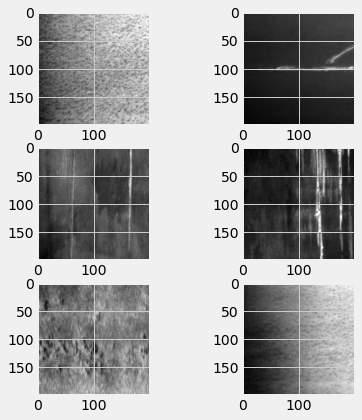

In [9]:
#plotando algumas imagens aleatórias

for i in range(0, 6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    plt.subplot(3,2,i+1)
    plt.imshow(img.reshape(200, 200), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(top=1.4)
plt.show()

In [10]:
#escalonando x_train e x_test

x_train = x_train / 255
x_test = x_test / 255

In [12]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', padding='same', input_shape=(200, 200,1)))
model.add(Conv2D(64, (5,5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

optimizer = Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 200, 200, 32)      832       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 200, 200, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 100, 64)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 640000)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               327680512 
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

In [ ]:
# reduz o parâmetro de learning rate se não houver melhoras em determinado número de epocas útil para encontrar o mínimo global.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

batch_size = 60
epochs = 15

history = model.fit(x_train,
                        y_train,
                        batch_size = batch_size,
                        epochs = epochs,
                        validation_split=0.2,
                        verbose = 1,
                        callbacks=[learning_rate_reduction])

history_dict = history.history
acc = history_dict['acc']
val_acc = history_dict['val_acc']
range_epochs = range(1, len(acc) + 1)

plt.style.use('default')
accuracy_val = plt.plot(range_epochs, val_acc, label='Acurácia no conjunto de validação')
accuracy_train = plt.plot(range_epochs, acc, label='Acurácia no conjunto de treino', color="r")
plt.setp(accuracy_val, linewidth=2.0)
plt.setp(accuracy_train, linewidth=2.0)
plt.xlabel('Épocas') 
plt.ylabel('Acurácia')
plt.legend(loc="lower right")
plt.show()

Epoch 1/15
20/20 [==============================] - 35888s 1794s/step - loss: 4.6790 - accuracy: 0.1684 - val_loss: 1.7776 - val_accuracy: 0.2222
Epoch 2/15
